In [188]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd

**Tehtävä 5**

Tutkitaan seuraavissa tehtävissä pistemääräfunktioiden (score-function, skoorifunktio) ominaisuuksia simulointien avulla. Generoi 10 otosta otoskoolla $n=20$ alla olevista jakaumista, ja piirrä samaan kuvaan kaikki 10 pistemääräfunktiota tuntemattoman parametrin funktiona. 

Generoi otokset seuraavasti:

a) $ Y_i \sim N(4, 1), \, i = 1,...,20 $

b) $ Y_i \sim Poisson(4), \, i = 1,...,20 $

c) $ Y_i \sim Bin(1, 0.4), \, i = 1,...,20 $

Nollakohdan tulisi olla pisteessä $ \mu = 4 $ (tai $\lambda=4$ Poisson-jakauman tapauksessa ja $\pi=4$ Binomijakauman tapauksessa).

**a)**

In [63]:
def S_norm(y, mu, n):
    
    f = n * (np.mean(y) - mu)
    return f

In [64]:
def score_norm(n):
    
    # Luodaan väliltä [0, 6] tasaisin välein (0.1) numeroita.
    mu = np.arange(0, 6.1, 0.1)
    
    # Generoidaan N(4, 1) -jakaumasta n arvoa.
    y = np.random.normal(4, 1, n)
    
    # Plotting.
    plt.plot(mu, S_norm(y, mu, n), color="black", linewidth=0.5)
    plt.xlabel("$\mu$", size=15)
    plt.ylabel("$S(\mu)$", rotation=0, labelpad=15, size=15)
    plt.title("Normal", size=15)
    
    # Generoidaan 10 otosta N(4, 1) -jakaumasta käyttämällä for-silmukkaa,
    # ja piirretään pistemääräfunktio mu:n funktiona.
    for i in range(10):
        y = np.random.normal(4, 1, n)
        plt.plot(mu, S_norm(y, mu, n), color="black", linewidth=0.5)
    
    # Lisätään horisontaalinen suora kohtaan y=0.
    plt.axhline(y=0, color="red")

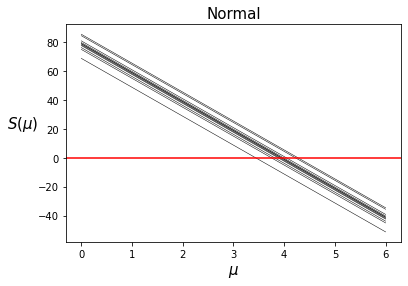

In [65]:
score_norm(20)

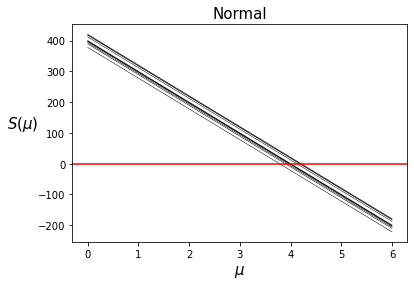

In [66]:
score_norm(100)

- Kun otoskokoa kasvatetaan, skoorifunktion nollakohdat lähestyvät haluttua nollakohtaa (4).

**b)**

In [67]:
def S_Poisson(y, lam, n):
    
    f = (n * (np.mean(y) - lam)) / lam
    return f

In [68]:
def score_poisson(n):
    
    # Luodaan väliltä [2, 6] tasaisin välein (0.1) numeroita.
    lam = np.arange(2, 6.1, 0.1)
    
    # Generoidaan Poisson(4) -jakaumasta n arvoa.
    y = np.random.poisson(4, size=n)
    
    # Plotting.
    plt.plot(lam, S_Poisson(y, lam, n), color="black", linewidth=0.5)
    plt.xlabel("$\lambda$", size=15)
    plt.ylabel("$S(\lambda)$", rotation=0, labelpad=15, size=15)
    plt.title("Poisson", size=15)
    
    # Generoidaan 10 otosta Poisson(4) -jakaumasta käyttämällä for-silmukkaa,
    # ja piirretään pistemääräfunktio lambdan funktiona.
    for i in range(10):
        y = np.random.poisson(4, size=n)
        plt.plot(lam, S_Poisson(y, lam, n), color="black", linewidth=0.5)
    
    # Lisätään horisontaalinen suora kohtaan y=0.
    plt.axhline(y=0, color="red")

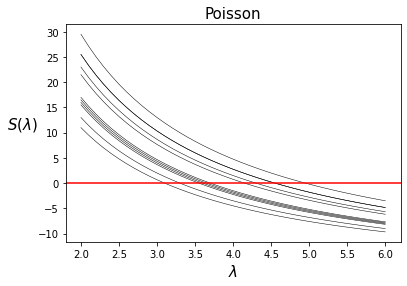

In [69]:
score_poisson(20)

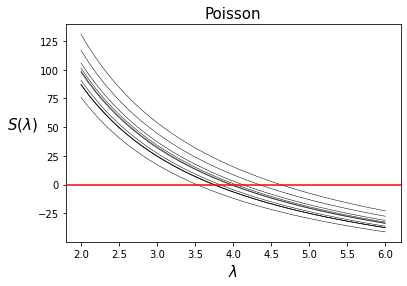

In [70]:
score_poisson(100)

- Jälleen, kun otoskoko kasvaa, skoorifunktion nollakohta lähestyy arvoa $ \lambda=4. $

**c)**

In [71]:
def S_bernoulli(y, pi, n):
    
    f = (n * (np.mean(y) - pi)) / (pi * (1 - pi))
    return f

In [72]:
def score_bernoulli(n):
    
    # Ilman tätä Python herjaa nollalla jakamisen mahdollisuudesta johtuen S_bernoulli()  -funktiosta.
    np.seterr(divide="ignore")
    
    # Luodaan väliltä [0, 1] tasaisin välein (0.01) numeroita.
    pi = np.arange(0, 1, 0.01)
    
    # Generoidaan Bernoulli(1, 0.4) -jakaumasta n arvoa.
    y = np.random.binomial(1, 0.4, size=n)
    
    # Plotting.
    plt.plot(pi, S_bernoulli(y, pi, n), color="black", linewidth=0.5)
    plt.xlabel("$\pi$", size=15)
    plt.ylabel("$S(\pi)$", rotation=0, labelpad=15, size=15)
    plt.title("Bernoulli", size=15)
    
    # Generoidaan 10 otosta Bernoulli(1, 0.4) -jakaumasta käyttämällä for-silmukkaa,
    # ja piirretään pistemääräfunktio piin funktiona.
    for i in range(10):
        y = np.random.binomial(1, 0.4, size=n)
        plt.plot(pi, S_bernoulli(y, pi, n), color="black", linewidth=0.5)
    
    # Lisätään horisontaalinen suora kohtaan y=0.
    plt.axhline(y=0, color="red")

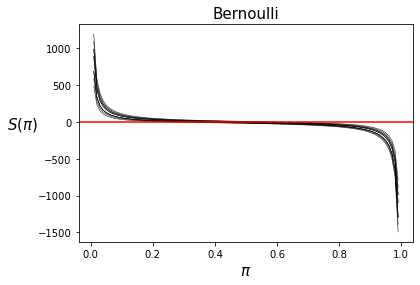

In [73]:
score_bernoulli(20)

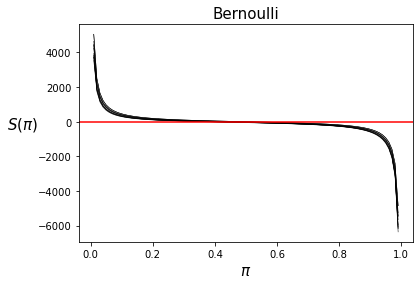

In [74]:
score_bernoulli(100)

**Tehtävä 6**

Tutkitaan seuraavaksi skoorifunktioiden otosjakaumia.

**a)** Generoi 100 otosta otoskoolla $n=20 \,$ Poisson(4) -jakaumasta, ja laske edellisen tehtävän funktiota hyväksikäyttäen kullekin otokselle skoorifunktion arvot pisteessä $\lambda = 4.$ Tutki näiden jakaumaa plottaamalla esimerkiksi skoorifunktioiden parametriton tiheysfunktioestimaatti. Muuttuuko jakauma, kun kasvatat otoskokoa?

In [75]:
Poisson_skoorifunktiot = []

for i in range(100):
    x = np.random.poisson(lam=4, size=20)
    Poisson_skoorifunktiot.append(S_Poisson(x, 4, 20))

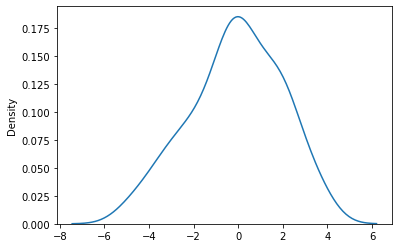

In [76]:
sns.kdeplot(Poisson_skoorifunktiot);

In [77]:
Poisson_skoorifunktiot2 = []

for i in range(100):
    x = np.random.poisson(lam=4, size=500)
    Poisson_skoorifunktiot2.append(S_Poisson(x, 4, 500))

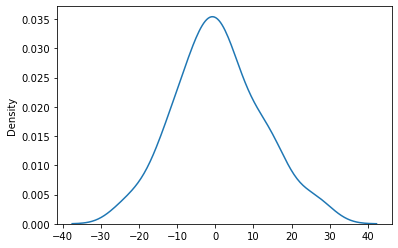

In [78]:
sns.kdeplot(Poisson_skoorifunktiot2);

- Jakauma menee "kasaan" jatkuvasti enemmän ja enemmän otoskoon kasvaessa.
- Ja koska tiheysfunktion pinta-ala on aina 1, niin tämä tarkoittaa sitä, että huippu tulee alaspäin ja hännät levenee.

**b)** Toista tarkastelu Bernoulli(0.4)-jakaumalle.

In [79]:
Bernoulli_skoorifunktiot = []

for i in range(100):
    x = np.random.binomial(1, 0.4, size=20)
    Bernoulli_skoorifunktiot.append(S_bernoulli(x, 0.4, 20))

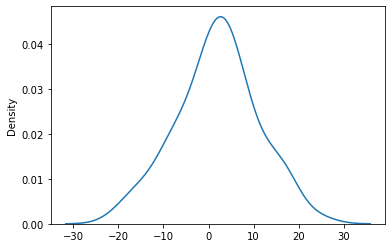

In [80]:
sns.kdeplot(Bernoulli_skoorifunktiot);

In [81]:
Bernoulli_skoorifunktiot2 = []

for i in range(100):
    x = np.random.binomial(1, 0.4, size=200)
    Bernoulli_skoorifunktiot2.append(S_bernoulli(x, 0.4, 200))

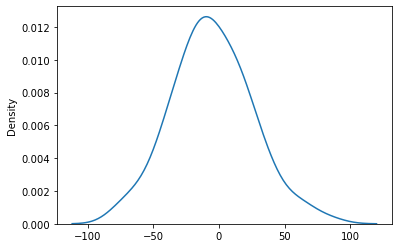

In [82]:
sns.kdeplot(Bernoulli_skoorifunktiot2);

- Samoin käy Bernoulli-jakauman tapauksessa, eli Jakauma menee kasaan.

**Tehtävät 7**

Tarkastellaan lasten riskiä sairastua korvatulehdukseen (Oja et al. 1995).

Sovitetaan aineistoon logistinen regressiomalli, jossa selittäjinä ovat tupakointi, lapsia-muuttuja sekä näiden yhdysvaikutus. Kirjoita näkyviin mallin kaava.

In [83]:
from statsmodels.formula.api import logit

In [84]:
data = pd.read_csv("C:/Users/testi/Desktop/R_GLM2/korvatulehdus_data.csv", index_col=0)

In [85]:
data.shape

(816, 3)

In [86]:
data.head()

,tulehdus,tupak,lapsia
1,1,0,2
2,1,0,2
3,1,1,3
4,0,0,2
5,0,0,2


In [87]:
data.dtypes

tulehdus    int64
tupak       int64
lapsia      int64
dtype: object

In [88]:
data["lapsia"] = data["lapsia"].astype("category")
data["tupak"] = data["tupak"].astype("category")

In [89]:
data.dtypes

tulehdus       int64
tupak       category
lapsia      category
dtype: object

In [90]:
X = data.drop("tulehdus", axis=1)

In [91]:
y = data["tulehdus"]

In [92]:
model = logit("tulehdus ~ tupak + lapsia + tupak*lapsia", data=data).fit()

Optimization terminated successfully.
         Current function value: 0.668347
         Iterations 6


In [93]:
model.params

Intercept                -0.526093
tupak[T.1]                0.680244
lapsia[T.2]               0.753671
lapsia[T.3]               1.364422
tupak[T.1]:lapsia[T.2]   -0.883129
tupak[T.1]:lapsia[T.3]    0.560869
dtype: float64

model equation:

$ logit(\pi_{tulehdus}) = \beta_0 \, + \, \beta_1 \, tupak[1] \, + \, \beta_2 \, lapsia[2] \, + \, \beta_3 \, lapsia[3] \, + \, \beta_4 \, tupak[1]*lapsia[2] \, + \, \beta_5 \, tupak[1]*lapsia[3] $

**Tehtävä 8**

**a)** Tulkitse tehtävän 7 tulokset huolellisesti: Millainen vaikutus sisarusten lukumäärällä on korvatulehdusten esiintyvyyteen perheissä, joissa ei tupakoida? Entä perheissä, joissa tupakoidaan?

In [94]:
beta = model.params

In [95]:
np.exp(beta[0])

0.5909090909090905

- Exponentiating $\mathbf{\beta_0}$ tells us that, for a child, who has no siblings and who's parents do not smoke, the odds off having atleast one ear infection within two years is 0.591.

In [100]:
np.exp(beta[1])

1.9743589743589751

- Exponentiating $\mathbf{\beta_1}$ tells us that, for a child, who's one or both parents smoke, the odds of having atleast one ear infection within two years is 1.97-fold compared to a child who's parents do not smoke, when lapsia-muuttuja has been adjusted. This means that the comparison is eligible only for kids who belong to the same sibling group (1 = no siblings, 2 = 1-2 siblings, 3 = otherwise).

In [97]:
np.exp(beta[2])

2.124786324786326

- Exponentiating $\mathbf{\beta_2}$ tells us that, for a child, who belongs to the sibling group 2 (the child has 1-2 siblings), the odds for having atleast one ear infection within two years is 2.12-fold compared to a child who belongs to the sibling group 1 (the child has no siblings), when the smoking variable has been adjusted. This means that the comparison is only eligible for kids who's parents belong to the same smoking group.

In [98]:
np.exp(beta[3])

3.913461538461541

- Exponentiating $\mathbf{\beta_3}$ tells us that, for a child, who belongs to the sibling group 3 (the child has more than two siblings),  the odds of having atleast one ear infection within two years is 3.91-fold compared to a child who belongs to the sibling group 1 (the child has no siblings), when the smoking variable has been adjusted.

In [99]:
np.exp(beta[4]+beta[2])

0.8785714285714289

- An interaction occurs if the relation between one predictor, X, and the outcome (response) variable, Y, depends on the value of another independent variable, Z.
- That being said, exponentiating $\mathbf{\beta_4 \, + \, \beta_2}$ tells us the effect of the interaction between smoking group and sibling group on the odds of infection. More specifically, it tells us how much the effect of smoking on the odds of ear infection changes when comparing kids who belong to the sibling group 1 (no siblings) and kids who belong to the sibling group 2 (1-2 siblings).

In [102]:
np.exp(beta[5]+beta[3])

6.857142857142862

- Same interpretation as above, except now the groups being compared are from groups 1 and 3.

**b)** Testaa devianssien erotuksen avulla, voiko yhdysvaikutustermin pudottaa pois.

$H_0 :$ "malli $M_1$ on oikea"

$H_1 :$ "malli $M_2$ on oikea"

In [104]:
fit1 = logit("tulehdus ~ tupak + lapsia", data=data).fit()

Optimization terminated successfully.
         Current function value: 0.671780
         Iterations 5


In [105]:
fit2 = logit("tulehdus ~ tupak + lapsia + tupak*lapsia", data=data).fit()

Optimization terminated successfully.
         Current function value: 0.668347
         Iterations 6


\begin{align}
Deviance_{residual} &= 2(LL(Saturated \, model) - LL(Proposed \, model)) \\
&= 2(-LL(Proposed \, model))
\end{align}

<center>, where LL = Log-Likelihood.</center>

$ Test \, statistic = D_1 - D_2 \sim \chi^2_{\Delta \, in \, \# \, \beta's} $

- (The test statistic follows a $\mathbf{\chi^2}$ distribution with a degrees of freedom of the change in the number of explanatory variables between $Model_1 \, and \, Model_2$)

In [182]:
dev_fit1 = 2*(-fit1.llf)

In [183]:
dev_fit2 = 2*(-fit2.llf)

In [216]:
testisuure = dev_fit1 - dev_fit2

In [217]:
testisuure

5.602038186317031

In [226]:
1 - scipy.stats.chi2.cdf(testisuure, 1)

0.01793959540518686

- Nollahypoteesi voidaan hylätä, joten malli, jossa on yhdysvaikutus mukana, on parempi malli.